<a href="https://colab.research.google.com/github/simonaron1111/GA_algoritmusok/blob/main/Simon_%C3%81ron_GA_bev_ACO_algoritmusok_gyakorlas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hangyakolónia algoritmus – gráfos gyakorló feladatok (sablon)

Ez a notebook **gyakorló feladatokhoz** készült.  
Ahol `TODO` jelölést látsz, ott neked kell megírni a kódot.

## 1. feladat (könnyű): Gráf reprezentáció és szomszédok

Reprezentáld a gráfot, majd írj `neighbors(node)` függvényt.

In [1]:
# TODO: gráf létrehozása
graph = {
    0: {1: 111.73, 2: 49.04, 3: 53.08, 4: 13.04},
    1: {2: 70.66, 3: 80.96, 4: 121.83},
    2: {3: 15.65, 4: 61.68},
    3: {4: 66.12},
    4: {}
}

def neighbors(node):
    all_neighbors = {}
    if node in graph:
        all_neighbors.update(graph[node])

    for origin_node, connections in graph.items():
        if node in connections:
            all_neighbors[origin_node] = connections[node]

    return all_neighbors

## 2. feladat (könnyű): Heurisztika η_ij

Definiáld a heurisztikus értéket az élekre, pl. η_ij = 1 / distance.

In [3]:
import math

# TODO: heurisztika
def heuristic_eta(i, j, graph):
    return 1 / neighbors(i)[j]

## 3. feladat (közepes): Lépési valószínűségek

Számítsd ki p_ij^k értékeit a dián szereplő képlet alapján.

In [15]:
# TODO: lépési valószínűségek
def transition_probabilities(i, tabu, tau, graph, alpha=0.5):
    """Visszaadja a {j: p_ij} szótárat."""
    p = {}
    sum = 0
    for node, dist in neighbors(i).items():
      if node in tabu:
        continue
      sum += alpha * tau[i][node] + (1 - alpha) * dist
    for node, dist in neighbors(i).items():
      if node in tabu:
        p[node] = 0
      else:
        p[node] = (alpha * tau[i][node] + (1 - alpha) * dist) / sum
    return p


## 4. feladat (közepes): Egy hangya útja

Építs fel egy hangya útvonalat start csúcsból, tabu listával.

In [30]:
import random

# TODO: egy hangya megoldása
def construct_ant_solution(start_node, graph, tau, alpha=0.5):
    path = [start_node]
    length = 0
    while len(path) < len(graph.keys()):
      curr_node = path[-1]
      p = transition_probabilities(curr_node, path, tau, graph, alpha)
      next_node = random.choices(list(p.keys()), weights=list(p.values()))[0]
      path.append(next_node)
      length += neighbors(curr_node)[next_node]
    length += neighbors(path[-1])[start_node]
    return path, length

## 5. feladat (közepes): Feromonfrissítés

Használd a τ_ij(t) = τ_ij(t-1) + Δτ_ij jellegű frissítést.

In [8]:
# TODO: feromonfrissítés
def update_pheromones_for_path(tau, path, Q=1.0):
    for node in path:
        for neighbor in neighbors(node):
            amount = Q / neighbors(node)[neighbor]
            tau[node][neighbor] += amount
            tau[neighbor][node] += amount
    return tau

## 6. feladat (nehéz): Egyszerű ACO ciklus

Rakd össze egy egyszerű ACO fő ciklust több hangyával.

In [38]:
# TODO: egyszerű ACO futtatása
def run_simple_aco(graph, n_ants=5, n_iters=20, alpha=0.5):
    tau = {}
    best_path = None
    best_length = float("inf")
    for node in graph:
      for other_node in graph:
        if node not in tau:
          tau[node] = {}
        if other_node not in tau[node]:
          tau[node][other_node] = 1
    for _ in range(n_iters):
      paths = []
      for ant in range(n_ants):
        path, length = construct_ant_solution(0, graph, tau, alpha)
        paths.append(path)
        if best_length > length:
          best_length = length
          best_path = path
      for path in paths:
        tau = update_pheromones_for_path(tau, path)
    return best_path, best_length

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

def plot_path_from_distances(graph_dict, path_indices, close_loop=True):
    nodes = set(graph_dict.keys())
    for neighbors in graph_dict.values():
        nodes.update(neighbors.keys())

    sorted_nodes = sorted(list(nodes))
    n = len(sorted_nodes)

    node_to_idx = {node: i for i, node in enumerate(sorted_nodes)}

    dist_matrix = np.zeros((n, n))

    for u, neighbors in graph_dict.items():
        for v, dist in neighbors.items():
            i, j = node_to_idx[u], node_to_idx[v]
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist

    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42, normalized_stress='auto')
    coords = mds.fit_transform(dist_matrix)
    num_points = len(coords)

    if close_loop:
      path_indices = np.concatenate([path_indices, [path_indices[0]]])

    # --- Step 3: Plotting ---
    plt.figure(figsize=(8, 6))

    # Plot the path lines
    # We re-order the coordinates based on our calculated path_indices
    path_x = coords[path_indices, 0]
    path_y = coords[path_indices, 1]

    plt.plot(path_x, path_y, linestyle='--', color='gray', alpha=0.7, label='Path')

    # Plot the points
    plt.scatter(coords[:, 0], coords[:, 1], c='blue', s=100, zorder=5)

    # Add labels (0, 1, 2...)
    for i in range(num_points):
        plt.text(coords[i, 0], coords[i, 1] + 0.05, str(i),
                 fontsize=12, ha='center', fontweight='bold')

    plt.title(f"Reconstructed Positions & Path\n(Stress: {mds.stress_:.2f})")
    plt.xlabel("MDS Dimension 1")
    plt.ylabel("MDS Dimension 2")
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axis('equal') # Important to keep visual distances accurate
    plt.show()

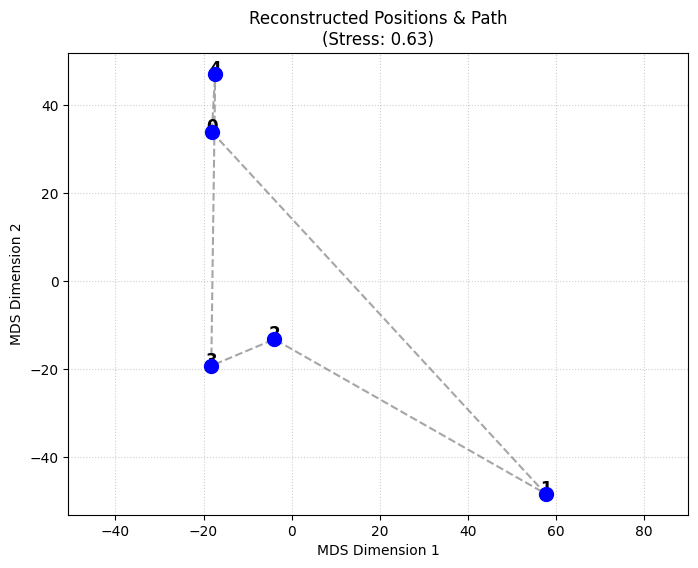

best_path=[0, 1, 2, 3, 4]
best_length=277.2


In [66]:
best_path, best_length = run_simple_aco(graph)
plot_path_from_distances(graph, best_path)
print(f'{best_path=}')
print(f'{best_length=}')